###What this code does:

1.  Loads the Mall Customers dataset.
2.   Preprocesses gender & scales features.
3.   Runs EDA (plots distribution & relationships).
4.   Uses the Elbow Method to find the best number of clusters.
5.   Applies K-Means Clustering.
6.   Evaluates clusters with Silhouette Score.
7.   Visualizes customer groups.
8.   Prints insights for each cluster.













In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# Step 2: Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ProjectProRepo/Data-Mining-Projects/main/datasets/Mall_Customers.csv')

In [7]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Step 3: Preprocessing
# Encode Gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Genre"])  # Male=1, Female=0

In [10]:
# Select features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



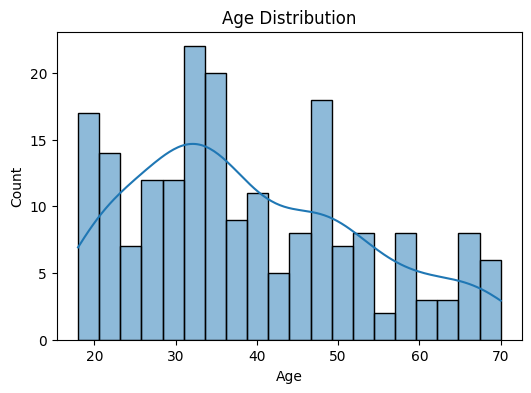

In [24]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

Demographic Analysis

/tmp/ipython-input-1143698136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


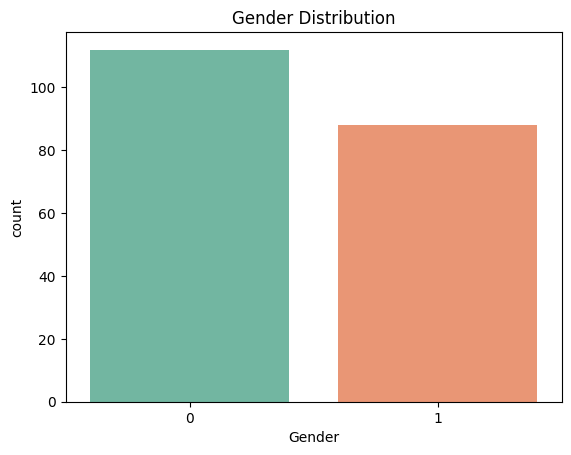

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()


/tmp/ipython-input-827353704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AgeGroup", data=df, palette="coolwarm")


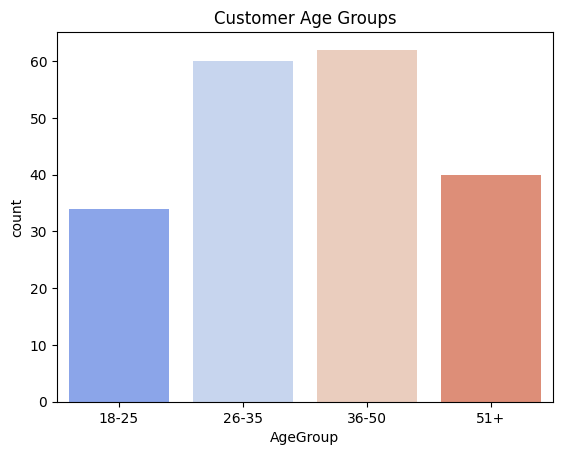

In [18]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[18,25,35,50,70], labels=["18-25","26-35","36-50","51+"])
sns.countplot(x="AgeGroup", data=df, palette="coolwarm")
plt.title("Customer Age Groups")
plt.show()


Income vs. Spending Behavior

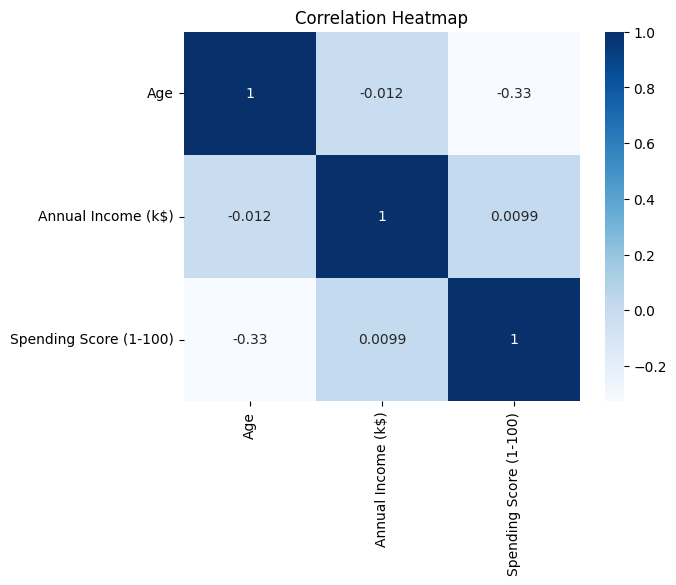

In [22]:
sns.heatmap(df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


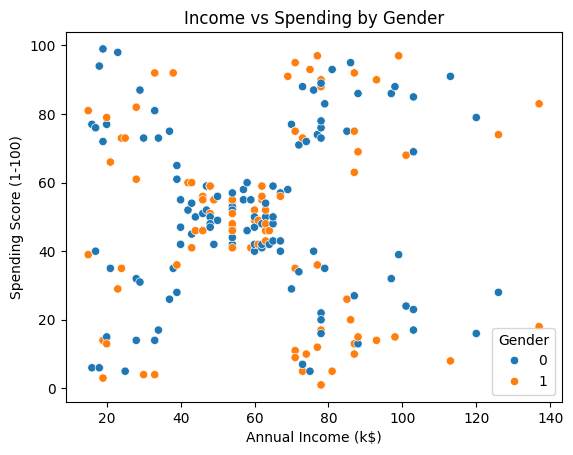

In [23]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Income vs Spending by Gender")
plt.show()


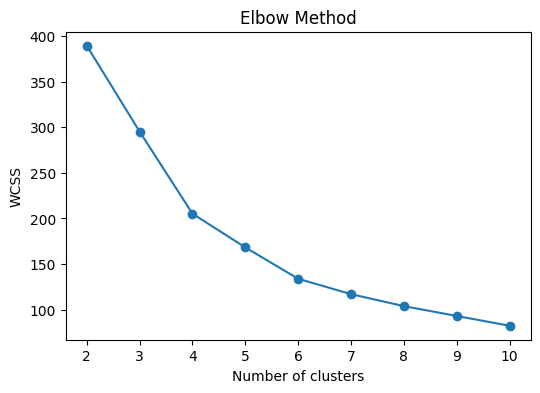

In [13]:
# Step 5: Elbow Method to find optimal clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
# Step 6: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

# Step 7: Evaluate clustering
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.41664341513732767


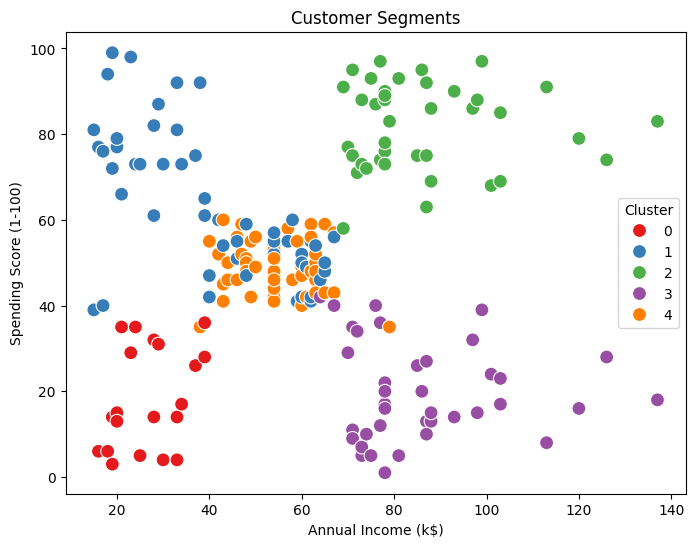

In [15]:
# Step 8: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set1",
    s=100
)
plt.title("Customer Segments")
plt.show()

In [16]:
# Step 9: Cluster Insights
print(df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [19]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

# Example: Give names to clusters
cluster_names = {
    0: "Budget-Conscious Customers",
    1: "Premium Shoppers",
    2: "Young Spenders",
    3: "Mid-range Customers",
    4: "High Income but Low Spending"
}
df["Cluster Label"] = df["Cluster"].map(cluster_names)

print(df[["CustomerID","Cluster","Cluster Label"]].head(10))


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064
   CustomerID  Cluster               Cluster Label
0           1        1            Premium Shoppers
1           2        1            Premium Shoppers
2           3        0  Budget-Conscious Customers
3           4        1            Premium Shoppers
4           5        1            Premium Shoppers
5           6        1            Premium Shoppers
6           7        0  Budget-Conscious Customers
7           8        1            Premium Shoppers
8           9        0  Budget-Conscious Customers
9          10        1            Premium Shopper

/tmp/ipython-input-2344302576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster Label", data=df, palette="Set1")


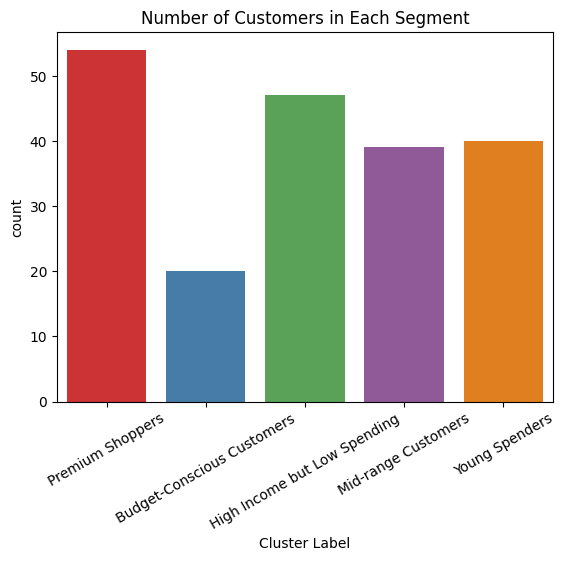

In [20]:
sns.countplot(x="Cluster Label", data=df, palette="Set1")
plt.title("Number of Customers in Each Segment")
plt.xticks(rotation=30)
plt.show()


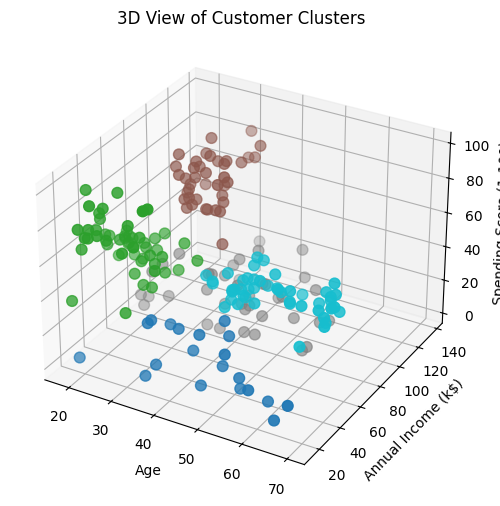

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"],
           c=df["Cluster"], cmap="tab10", s=60)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("3D View of Customer Clusters")
plt.show()
